In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from tqdm.notebook import tqdm

In [39]:
datapath = "D:\\Dati_dso\\tesi\\"

In [40]:
ls $datapath

 Il volume nell'unit… D Š Data
 Numero di serie del volume: 7009-8AD6

 Directory di D:\Dati_dso\tesi

29/08/2023  10:37    <DIR>          .
28/08/2023  17:44    <DIR>          ..
29/08/2023  10:28     1.085.099.394 20230828-1743_BGO_2SIPM_no-filtri_trigger_ext.txt
29/08/2023  11:24       395.062.574 dark_ch1.txt
               2 File  1.480.161.968 byte
               2 Directory  1.968.050.155.520 byte disponibili


In [42]:
df = pd.read_csv(datapath+'dark_ch1.txt', sep=" ", header=None, names=["frame", "x1", "y1", "x2", "y2"]).dropna()

In [55]:
df_large = pd.read_csv(datapath+'20230828-1743_BGO_2SIPM_no-filtri_trigger_ext.txt', sep=" ", header=None, names=["frame", "x1", "y1", "x2", "y2","x3","y3","x4","y4"]).dropna()
df_reduced = df.query("frame <100") 


In [57]:
df_reduced.to_csv("data_reduced_20230828.txt")

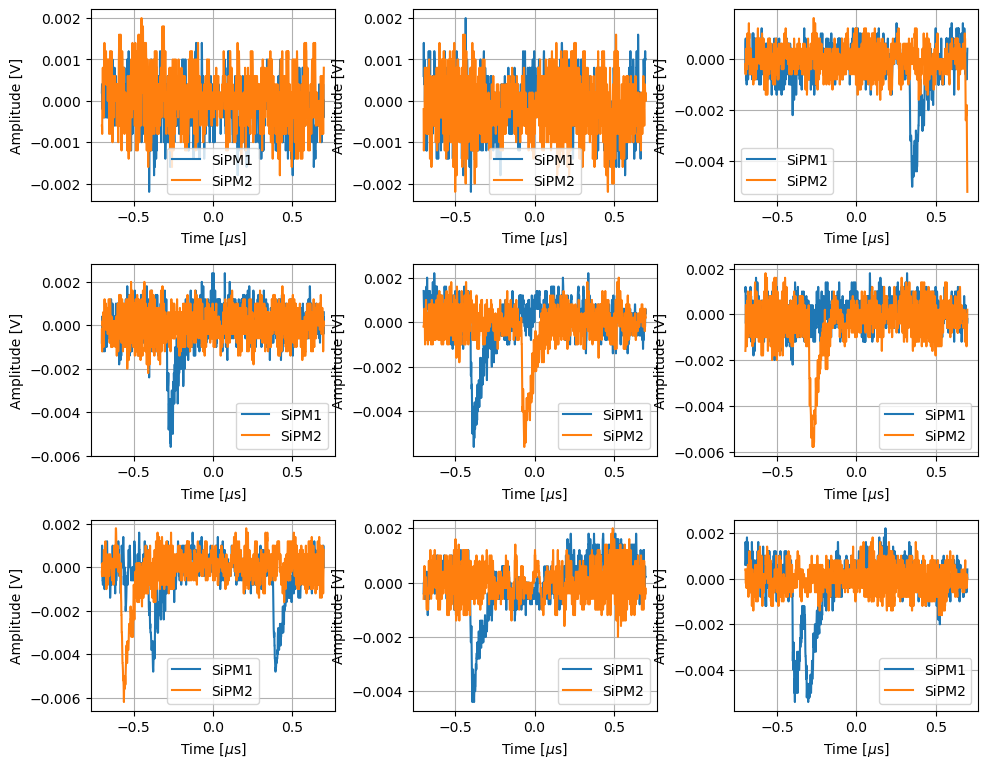

In [44]:
#%matplotlib widget
i=0
j=0
plots_per_row=3
FRAMES=[2, 3, 4, 5, 6, 7, 8, 9, 10]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.x1*1E6, d.y1, label='SiPM1')
    axs[i][j].plot(d.x2*1E6, d.y2, label='SiPM2')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('Amplitude [V]')#, size=14)
    axs[i][j].grid()
    axs[i][j].legend()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


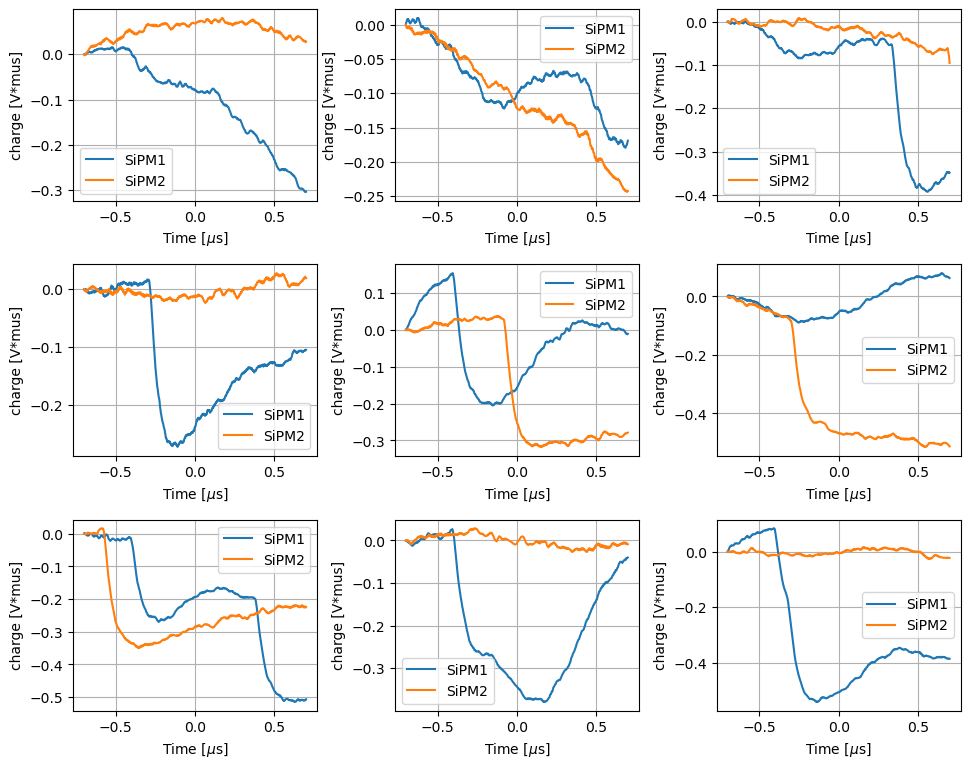

In [45]:
#%matplotlib widget
i=0
j=0
plots_per_row=3
FRAMES=[2, 3, 4, 5, 6, 7, 8, 9, 10]
fig, axs = plt.subplots(math.ceil(len(FRAMES)/plots_per_row), plots_per_row, figsize=(10, 8))
fig.tight_layout(pad=2.5)
for frame in FRAMES:
    d = df.query(f'frame=={frame}')
    axs[i][j].plot(d.x1*1E6, d.y1.cumsum(), label='SiPM1')
    axs[i][j].plot(d.x2*1E6, d.y2.cumsum(), label='SiPM2')
    axs[i][j].set_xlabel(r'Time [$\mu$s]')#, size=14)
    axs[i][j].set_ylabel('charge [V*mus]')#, size=14)
    axs[i][j].grid()
    axs[i][j].legend()
    j+=1
    if j%plots_per_row==0:
        i+=1
        j=0
plt.show()


In [46]:
CH2 = []
CH1 = []
for frame in df.frame.unique():
    d = df.query(f'frame=={frame}')
    CH2+=[np.max(np.abs(d.y2))]
    CH1+=[np.max(np.abs(d.y1))]


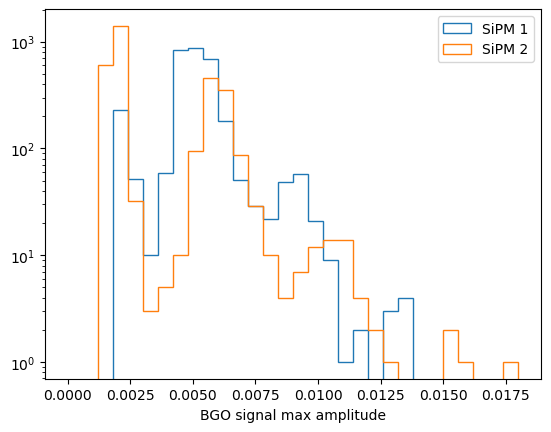

In [53]:
maxv = np.max([np.max(CH1), np.max(CH2)])

plt.hist(CH1, bins=30, range=[0, maxv], histtype='step', label='SiPM 1')
plt.hist(CH2, bins=30, range=[0, maxv], histtype='step', label='SiPM 2')

plt.legend()
plt.yscale('log')
plt.xlabel('BGO signal max amplitude')
plt.show()

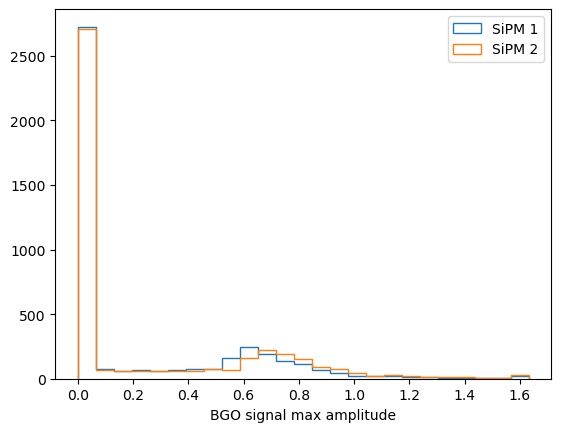

In [32]:
maxv = np.max([np.max(CH1), np.max(CH2)])

plt.hist(CH1, bins=25, range=[0., maxv], histtype='step', label='SiPM 1')
plt.hist(CH2, bins=25, range=[0., maxv], histtype='step', label='SiPM 2')

plt.legend()
#plt.yscale('log')
plt.xlabel('BGO signal max amplitude')
plt.show()

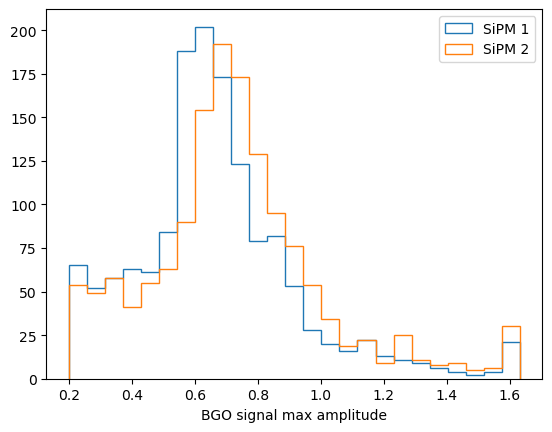

In [35]:
maxv = np.max([np.max(CH1), np.max(CH2)])

plt.hist(CH1, bins=25, range=[0.2, maxv], histtype='step', label='SiPM 1')
plt.hist(CH2, bins=25, range=[0.2, maxv], histtype='step', label='SiPM 2')

plt.legend()
#plt.yscale('log')
plt.xlabel('BGO signal max amplitude')
plt.show()

In [34]:
len(CH1)

4310

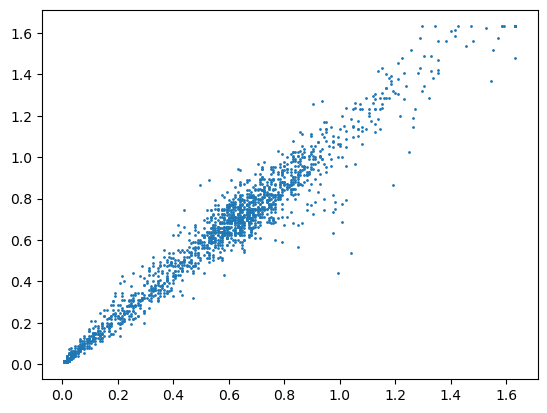

In [31]:
plt.scatter(CH1, CH2, s=1, label='filtro sopra')